In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

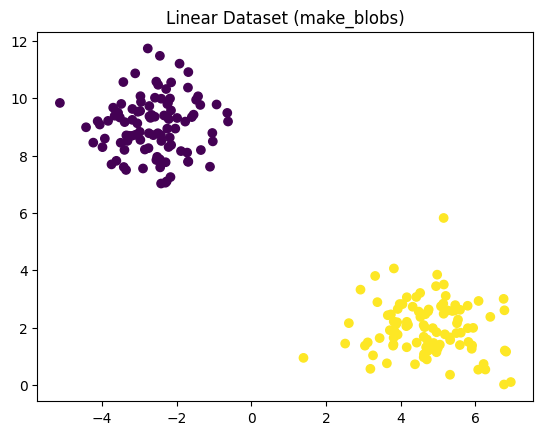

In [44]:
# Generate linear separable data
X, y = make_blobs(n_samples=200, centers=2, random_state=42)

# Plot original data
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Linear Dataset (make_blobs)")
plt.show()

# SVM theory uses +1 and -1, so convert labels
y = np.where(y == 0, 1, -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
def svm_fit(X, y, lr=0.001, epochs=1000, lambda_=0.01):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for epoch in range(epochs):
        for i, Xi in enumerate(X):
            condition = y[i] * (np.dot(Xi, w) + b) >= 1

            if condition:
                w -= lr * (2 * lambda_ * w)
            else:
                w -= lr * (2 * lambda_ * w - y[i] * Xi)
                b += lr * y[i]    

    return w, b
    
def predict(X, w, b):
    linear_output = np.dot(X, w) - b
    return np.where(linear_output >= 0, 1, -1)

w, b = svm_fit(X_train, y_train)
y_pred = predict(X_test, w, b)

print("Accuracy (Scratch Linear SVM):", accuracy_score(y_test, y_pred))

Accuracy (Scratch Linear SVM): 0.975


In [46]:
def plot_classifier(X, y, w, b, title):
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')

    x_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)
    y_vals = -(w[0] * x_vals + b) / w[1]

    plt.plot(x_vals, y_vals, 'k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


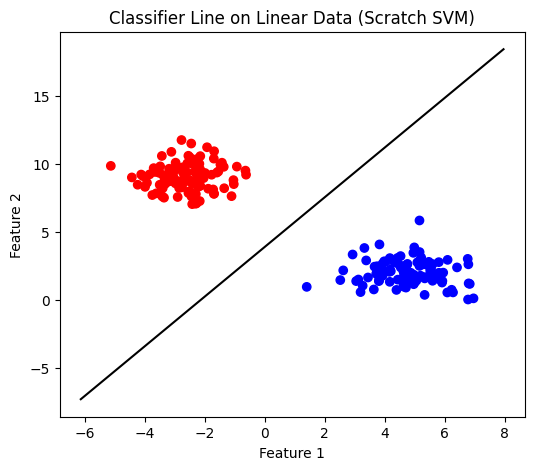

In [47]:
plot_classifier(X, y, w, b, "Classifier Line on Linear Data (Scratch SVM)")

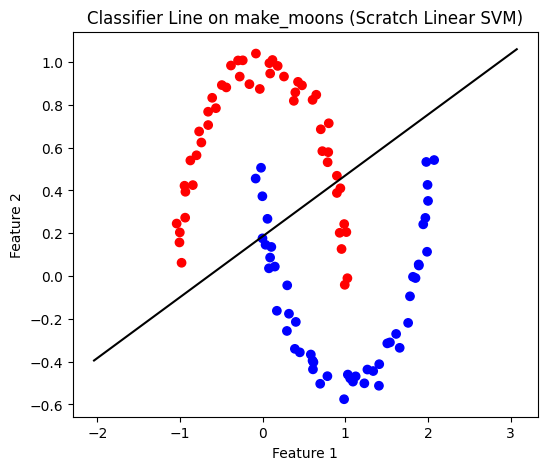

In [48]:
# ⭐ Apply same classifier to non-linear datasets
# make_moons:
X1, y1 = make_moons(n_samples=100, noise=0.05)
y1 = np.where(y1 == 0, 1, -1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

w1, b1 = svm_fit(X1_train, y1_train)
plot_classifier(X1, y1, w1, b1, "Classifier Line on make_moons (Scratch Linear SVM)")

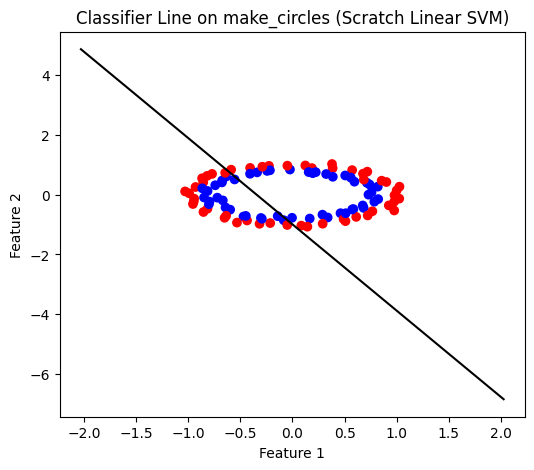

In [55]:
# make_circles:
X2, y2 = make_circles(n_samples=100, noise=0.05)
y2 = np.where(y2 == 0, 1, -1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

w2, b2 = svm_fit(X2_train, y2_train)
plot_classifier(X2, y2, w2, b2, "Classifier Line on make_circles (Scratch Linear SVM)")

Accuracy (SKLearn Linear SVM): 1.0


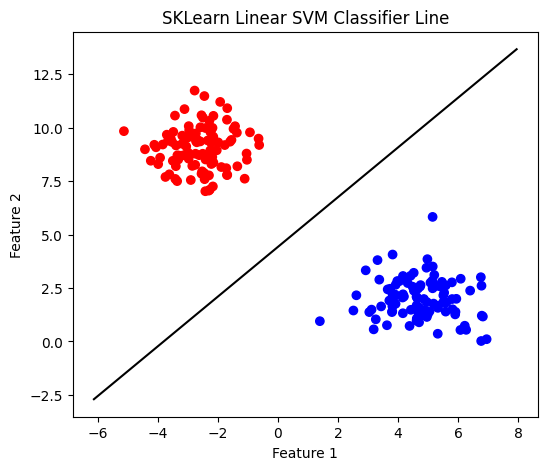

In [50]:
# EXERCISE 2 — SKLEARN LINEAR SVM
from sklearn.svm import SVC

# Linear SVM from sklearn
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, y_train)

y_pred_sk = clf_linear.predict(X_test)

print("Accuracy (SKLearn Linear SVM):", accuracy_score(y_test, y_pred_sk))

# ⭐ Plot SKLearn Linear Classifier Line
# Extract w and b from sklearn model
w_sk = clf_linear.coef_[0]
b_sk = clf_linear.intercept_[0]

plot_classifier(X, y, w_sk, b_sk, "SKLearn Linear SVM Classifier Line")

In [51]:
# EXERCISE 3 — SKLEARN NON-LINEAR SVM WITH KERNELS
# ⭐ 1. RBF Kernel (Best for Non-Linear Data)
# make_moons:
clf_rbf = SVC(kernel='rbf', gamma='scale')
clf_rbf.fit(X1_train, y1_train)

print("RBF Accuracy (make_moons):", accuracy_score(y1_test, clf_rbf.predict(X1_test)))

# make_circles:
clf_rbf2 = SVC(kernel='rbf', gamma='scale')
clf_rbf2.fit(X2_train, y2_train)

print("RBF Accuracy (make_circles):", accuracy_score(y2_test, clf_rbf2.predict(X2_test)))

# ⭐ 2. Polynomial Kernel
clf_poly = SVC(kernel='poly', degree=3)
clf_poly.fit(X1_train, y1_train)

print("Polynomial Kernel Accuracy:", accuracy_score(y1_test, clf_poly.predict(X1_test)))

# ⭐ 3. Sigmoid Kernel
clf_sigmoid = SVC(kernel='sigmoid')
clf_sigmoid.fit(X1_train, y1_train)

print("Sigmoid Kernel Accuracy:", accuracy_score(y1_test, clf_sigmoid.predict(X1_test)))

RBF Accuracy (make_moons): 1.0
RBF Accuracy (make_circles): 0.85
Polynomial Kernel Accuracy: 0.95
Sigmoid Kernel Accuracy: 0.75
